# Analisis de datos sobre el Titanic

La fuente de dato es un CSV sobre el titanic y viene desde la url [https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv]

# Libreria

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = titanic.copy()

# Diccionario de variables (features o columnas)

|Feature|Descripción |tipo de dato |clasificación de dato |tratamiento |
|---|--- |---- |--- |--- |
|``PassengerId``|  identificador único del pasajero. |int |indice |nada |
|``Survived``| si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). |int |binary/bool | |
|``Pclass``| clase a la que pertenecía el pasajero: 1, 2 o 3. |int |cualitativo ordinal | |
|``Name``| nombre del pasajero |string |cualitativo nominal | |
|``Sex``| sexo del pasajero. |string |binario | |
|``Age``| edad del pasajero. |float |cuantitativo discreto |transformar a entero |
|``SibSp``|número de hermanos, hermanas, hermanastros o hermanastras en el barco. |int |cuantitativo discreto | |
|``Parch``|número de padres e hijos en el barco.|int |cuantitativo discreto | |
|``Ticket``|  identificador del billete. |string |--- | |
|``Fare``| precio pagado por el billete. |float |cuantitativo continuo | |
|``Cabin``| identificador del camarote asignado al pasajero. |string |--- |eliminarla|
|``Embarked``| puerto en el que embarcó el pasajero. |string |cualitativo nominal | |

## Análisis técnico

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
(df.isnull().sum() / len(df))*100  #Analizar los missing que hay en cada fila

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
#for i in df:
    #print(f"El porcentaje de unicos por variable {col} son {round()}")
    

In [9]:
for col in ['Survived','Pclass','Sex','Embarked']:
    print(df[col].value_counts(normalize = True))
    print("--------")                       #Con Normalize pasas a porcentaje

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
--------
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64
--------
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
--------
Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64
--------


In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
# df[df['Age']<1]
# df['Age'] = df['Age'].apply(lambda x: 1 if x < 1 else x)

In [13]:
df.loc[df['Age'] < 1, 'Age'] = 1    # formas de transformar valores a 1

In [14]:
df['Age'].describe()

count    714.000000
mean      29.701681
std       14.521395
min        1.000000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
df['Age'] = df['Age'].apply(lambda row: int(str(row).split('.')[0]) if '.' in str(row) else row)

In [16]:
df['Age'].unique()

array([22., 38., 26., 35., nan, 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 30.,
       33., 23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51.,
       44., 61., 56., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13.,
       48., 53., 57., 80.,  6., 74.])

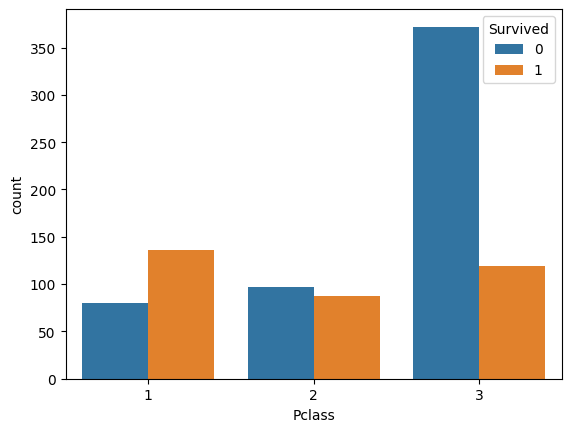

In [22]:
sns.countplot(data =df, x= 'Pclass', hue='Survived');